<a href="https://colab.research.google.com/github/ygeszvain/projects/blob/master/Bitcoin_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install quandl

In [42]:
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [0]:
quandl.ApiConfig.api_key = "_1apdhB3ntHfGnLkydwz"

In [0]:
df = quandl.get("BITSTAMP/USD")

In [0]:
df = pd.DataFrame(df)
df = df.reset_index(drop=False)

In [18]:
df.head(3)

,Date,High,Low,Last,Bid,Ask,Volume,VWAP
0,2014-04-15,515.00,453.16,499.01,500.01,505.04,28535.844106,491.41
1,2014-04-16,548.00,494.02,534.00,535.01,536.00,31159.941300,520.21
2,2014-04-17,537.24,481.63,506.52,504.70,505.38,21126.375080,504.83


In [17]:
df.tail(3)

,Date,High,Low,Last,Bid,Ask,Volume,VWAP
1849,2019-06-01,8624.72,8457.33,8582.42,8582.41,8584.05,5155.759822,8543.21
1850,2019-06-02,8833.97,8528.79,8739.94,8740.64,8741.36,4346.863530,8695.53
1851,2019-06-03,8764.88,8314.39,8474.95,8474.97,8476.04,8373.175334,8502.79


In [9]:
df.describe()

,High,Low,Last,Bid,Ask,Volume,VWAP
count,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000
mean,2960.133207,2761.331830,2871.650254,2869.943753,2872.666582,10912.800774,2862.030427
std,3655.103323,3339.948803,3517.681855,3515.527608,3518.838017,9327.407839,3498.117039
min,212.840000,152.400000,170.000000,170.020000,171.800000,707.227604,191.870000
25%,415.797500,393.550000,407.885000,406.870000,407.925000,4950.724998,405.082500
50%,737.035000,710.340000,728.430000,728.280000,728.645000,8364.117883,728.100000
75%,4946.225000,4676.927500,4766.545000,4764.830000,4772.057500,14213.835168,4789.635000
max,19666.000000,18465.000000,19204.870000,19163.000000,19203.890000,123651.530246,19110.280000


In [0]:
df['Date'] = pd.to_datetime(df['Date'])

In [28]:
df.dtypes

Date      datetime64[ns]
High             float64
Low              float64
Last             float64
Bid              float64
Ask              float64
Volume           float64
VWAP             float64
dtype: object

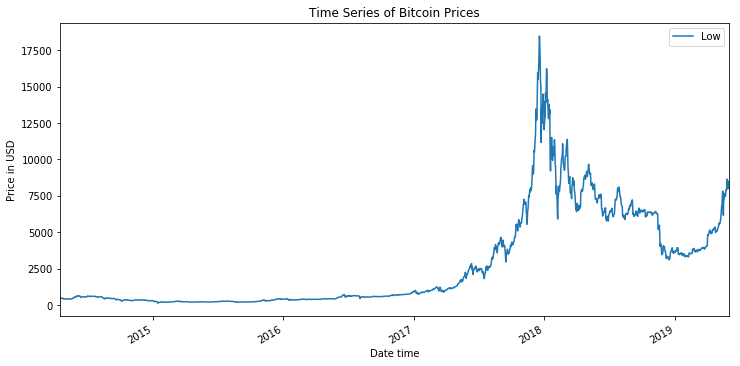

In [19]:
# plot the data
df.plot(x='Date', y='Low', figsize=(12,6))
plt.xlabel('Date time')
plt.ylabel('Price in USD')
plt.title('Time Series of Bitcoin Prices');

In [39]:
df['Date'] = pd.to_datetime(df['Date'])
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
df = df.dropna(subset=['Low'])
df['year'] = df['Date'].apply(lambda x: x.year)
df['quarter'] = df['Date'].apply(lambda x: x.quarter)
df['month'] = df['Date'].apply(lambda x: x.month)
df['day'] = df['Date'].apply(lambda x: x.day)
df=df.loc[:,['Date','Low', 'year','quarter','month','day']]
df.sort_values('Date', inplace=True, ascending=True)
df = df.reset_index(drop=True)
df["weekday"]=df.apply(lambda row: row["Date"].weekday(),axis=1)
df["weekday"] = (df["weekday"] < 5).astype(int)
print('Number of rows and columns after removing missing values:', df.shape)
print('The time series starts from: ', df.Date.min())
print('The time series ends on: ', df.Date.max())

Number of rows and columns after removing missing values: (1852, 7)
The time series starts from:  2014-04-15 00:00:00
The time series ends on:  2019-06-03 00:00:00


In [44]:
stat, p = stats.normaltest(df.Low)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=470.080, p=0.000
Data does not look Gaussian (reject H0)


Kurtosis of normal distribution: 1.9000546320446876
Skewness of normal distribution: 1.4878526692551497


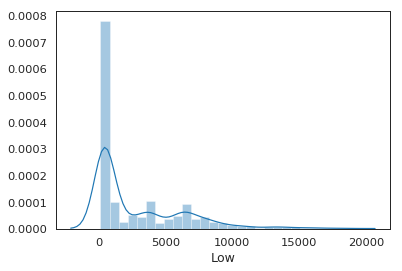

In [45]:
sns.distplot(df.Low);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df.Low)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(df.Low)))

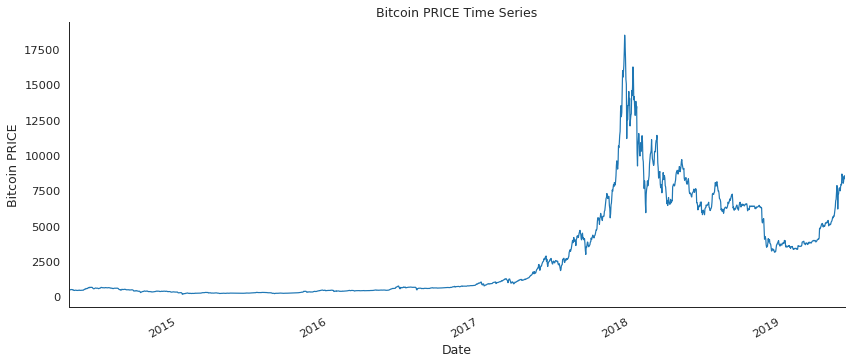

In [46]:
df1=df.loc[:,['Date','Low']]
df1.set_index('Date',inplace=True)
df1.plot(figsize=(12,5))
plt.ylabel('Bitcoin PRICE')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Bitcoin PRICE Time Series')
sns.despine(top=True)
plt.show();

,count,mean,std,min,25%,50%,75%,max
Low,1852.0000,2761.3318,3339.9488,152.4000,393.5500,710.3400,4676.9275,18465.0000


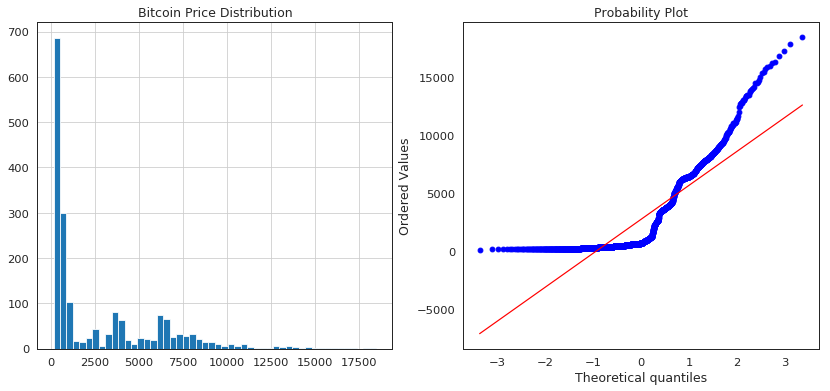

In [48]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['Low'].hist(bins=50)
plt.title('Bitcoin Price Distribution')
plt.subplot(1,2,2)
stats.probplot(df['Low'], plot=plt);
df1.describe().T

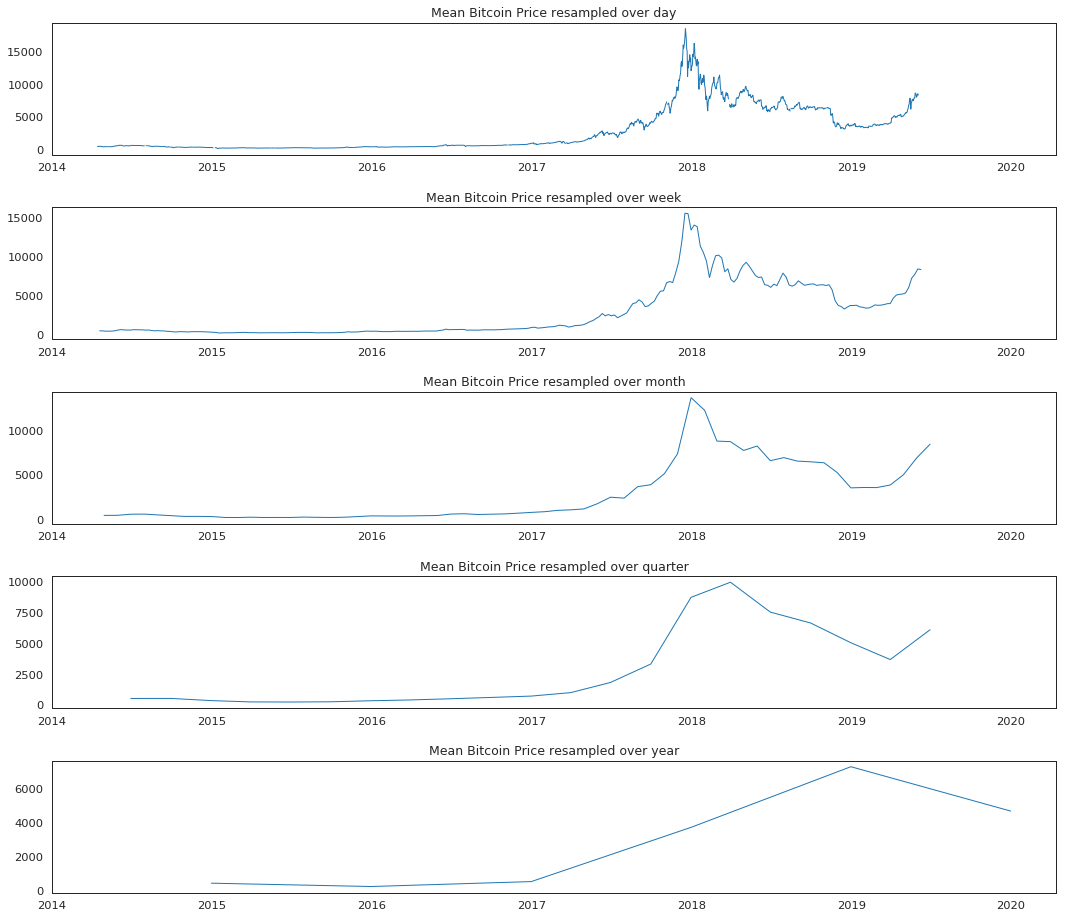

In [49]:
fig = plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=.4)
ax1 = fig.add_subplot(5,1,1)
ax1.plot(df1['Low'].resample('D').mean(),linewidth=1)
ax1.set_title('Mean Bitcoin Price resampled over day')
ax1.tick_params(axis='both', which='major')

ax2 = fig.add_subplot(5,1,2, sharex=ax1)
ax2.plot(df1['Low'].resample('W').mean(),linewidth=1)
ax2.set_title('Mean Bitcoin Price resampled over week')
ax2.tick_params(axis='both', which='major')

ax3 = fig.add_subplot(5,1,3, sharex=ax1)
ax3.plot(df1['Low'].resample('M').mean(),linewidth=1)
ax3.set_title('Mean Bitcoin Price resampled over month')
ax3.tick_params(axis='both', which='major')

ax4  = fig.add_subplot(5,1,4, sharex=ax1)
ax4.plot(df1['Low'].resample('Q').mean(),linewidth=1)
ax4.set_title('Mean Bitcoin Price resampled over quarter')
ax4.tick_params(axis='both', which='major')

ax5  = fig.add_subplot(5,1,5, sharex=ax1)
ax5.plot(df1['Low'].resample('A').mean(),linewidth=1)
ax5.set_title('Mean Bitcoin Price resampled over year')
ax5.tick_params(axis='both', which='major');

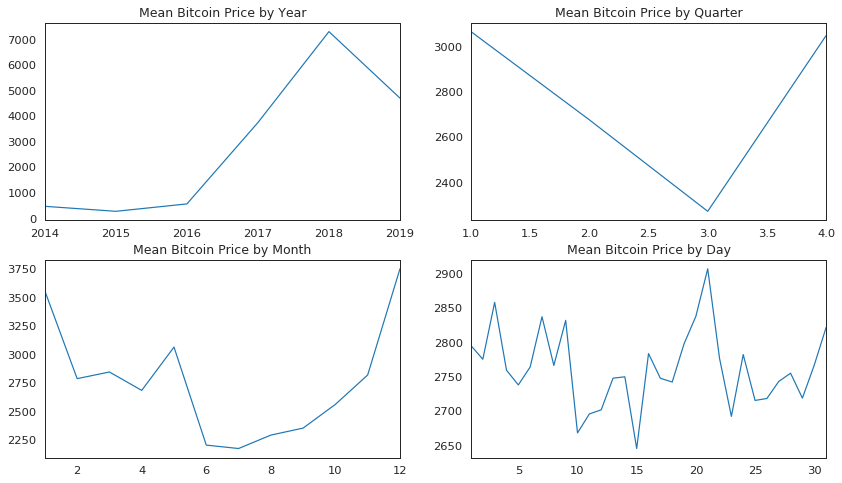

In [50]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
df.groupby('year').Low.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Bitcoin Price by Year')

plt.subplot(2,2,2)
df.groupby('quarter').Low.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Bitcoin Price by Quarter')

plt.subplot(2,2,3)
df.groupby('month').Low.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Bitcoin Price by Month')

plt.subplot(2,2,4)
df.groupby('day').Low.agg('mean').plot()
plt.xlabel('')
plt.title('Mean Bitcoin Price by Day');

**Dickey-Fuller test**

Null Hypothesis (H0): It suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): It suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

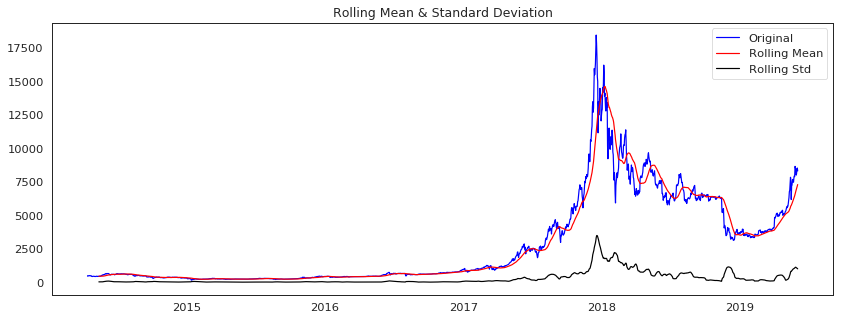

<Results of Dickey-Fuller Test>
Test Statistic                  -1.5116
p-value                          0.5278
#Lags Used                      24.0000
Number of Observations Used   1827.0000
Critical Value (1%)             -3.4339
Critical Value (5%)             -2.8631
Critical Value (10%)            -2.5676
dtype: float64


In [52]:
df2=df1.resample('D', how=np.mean)

def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    plt.figure(figsize=(14,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(df2.Low.dropna())

**we will not reject the null hypothesis H0, the data does have a unit root and is not stationary.**

In [0]:
dataset = df.Low.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [54]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 1450 samples, validate on 340 samples
Epoch 1/20
1450/1450 [==============================] - 2s 1ms/step - loss: 0.0050 - val_loss: 0.0018
Epoch 2/20
1450/1450 [==============================] - 0s 117us/step - loss: 0.0088 - val_loss: 0.0051
Epoch 3/20
1450/1450 [==============================] - 0s 117us/step - loss: 0.0115 - val_loss: 0.0079
Epoch 4/20
1450/1450 [==============================] - 0s 116us/step - loss: 0.0049 - val_loss: 0.0058
Epoch 5/20
1450/1450 [==============================] - 0s 118us/step - loss: 0.0038 - val_loss: 0.0019
Epoch 6/20
1450/1450 [==============================] - 0s 116us/step - loss: 0.0025 - val_loss: 0.0026
Epoch 7/20
1450/1450 [==============================] - 0s 125us/step - loss: 0.0022 - val_loss:

In [55]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 544.6312326828378
Train Root Mean Squared Error: 1240.863621022601
Test Mean Absolute Error: 1154.0499595573044
Test Root Mean Squared Error: 1296.061937125334


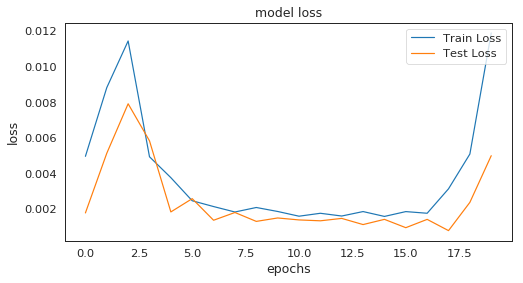

In [56]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

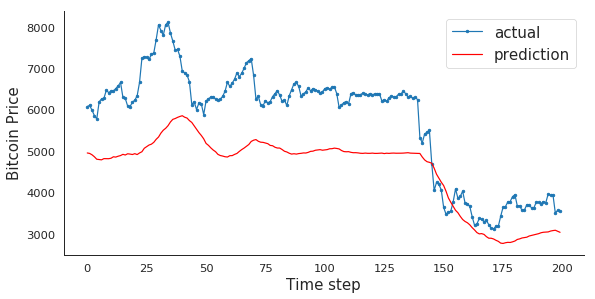

In [59]:
aa=[x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Bitcoin Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();


Credit: https://towardsdatascience.com/time-series-analysis-visualization-forecasting-with-lstm-77a905180eba